CSE676: Deep Learning 
Project: Sentiment analysis on IMDb Movie Reviews dataset
Sanchit Krishna Anandraj
Abhinandan Vijan 
Satvik Singh

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [6]:
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative': 0})

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size = 0.2)

In [8]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),                                                   
    ('random_forest', (RandomForestClassifier(n_estimators=10, criterion='entropy')))      
])

clf.fit(X_train, Y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78      5048
           1       0.80      0.71      0.75      4952

    accuracy                           0.77     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.77      0.76     10000



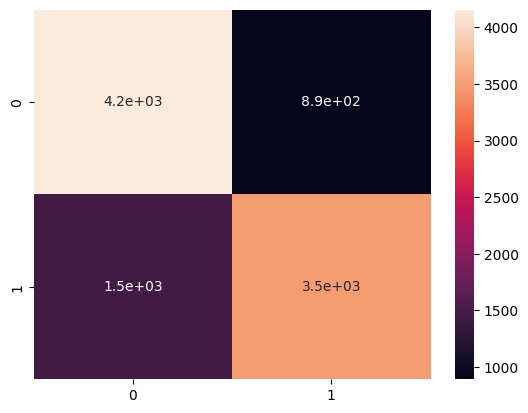

In [9]:
import seaborn as sns
Y_pred = clf.predict(X_test)
print('Classification Report:\n',classification_report(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot = True)
plt.show()